**Linear Regression with Keras**

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [54]:
import pandas as pd
df_wh = pd.read_csv('/content/weight-height.csv')

In [55]:
df_wh.sample(5)

,Gender,Height,Weight
1697,Male,68.162147,183.232712
6396,Female,59.330819,102.515973
9542,Female,60.759728,114.306428
4454,Male,69.128357,184.142281
2953,Male,71.006749,195.230403


In [56]:
X = df_wh['Height']
y_true = df_wh['Height']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size = 0.2)

In [58]:
len(X_train)

8000

In [59]:
len(X_test)

2000

In [60]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [63]:
W, B = model.get_weights()

In [64]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [65]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [66]:
model.fit(X_train, y_train, epochs = 50, verbose=0)

In [67]:
y_pred = model.predict(X)

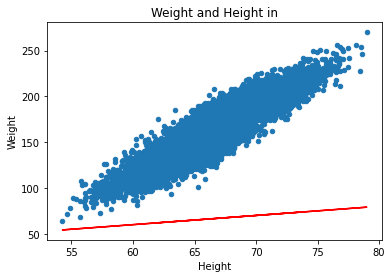

In [72]:
import matplotlib.pyplot as plt

df_wh.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in')
plt.plot(X, y_pred, color='red')

In [68]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [69]:
from sklearn.metrics import mean_squared_error as mse

In [70]:
print("The MSE on train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The MSE on test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The MSE on train set is:	0.1
The MSE on test set is:	0.1


In [71]:
from sklearn.metrics import r2_score
print("The r2 score on train set is:\t{:0.1f}".format(r2_score(y_train, y_train_pred)))
print("The r2 score on test set is:\t{:0.1f}".format(r2_score(y_test, y_test_pred)))

The r2 score on train set is:	1.0
The r2 score on test set is:	1.0
